## Исследование рынка компьютерных игр

**Цель** - спланировать рекламные кампании на будущий год, сделав ставку на потенциально популярный продукт.

**Задача** - выявить закономерности, определяющие успешность игры.


*В нашем распоряжении файл games.csv, содержащий следующие данные:*

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План:**
1. Оценка полученных данных
2. Предобработка данных
3. Проведение исследовательского анализа
4. Составление портрета пользователя каждого региона
5. Проверка гипотез - Статитстический анализ
6. Общий вывод

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

pd.set_option('mode.chained_assignment', None)

In [2]:
try:
    games_first = pd.read_csv('games.csv')
except:
    path = 'https://code.s3.yandex.net/datasets/games.csv'
    games_first = pd.read_csv(path)

### Ознакомимся с представленными данными

In [3]:
games_first.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Создадим функцию, чтобы была возможность в один шаг увидеть всю общую информацию.

In [4]:
def common_info(df):
    df.info() 
    print('\nОсновные статистические данные')
    display(df.describe()),
    print('Пропуски'),
    display(df.isna().sum()),
    print('Дубликаты'),
    display(df.duplicated().sum()
    )
    
common_info(games_first)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Основные статистические данные


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропуски


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Дубликаты


0

**При первичной оценке отмечаем, что:**

- в нашем распоряжении данные с 1980 по 2016 гг.;
- рейтинг- буквенные обозначения согласно ESRB, с которым позднее подробнее ознакомимся;
- оценка пользователей представлена по 10-ти бальной шкале,а критиков по 100 бальной.

**Обращает на себя внимание:**
- особенности оформления - названия колонок начинаются с заглавных букв;
- типы данных - год выпуска float и оценка пользователя - object,причина?
- наличие большого кол-ва пропусков в колонках с оценками и рейтингом;
- явные дубликаты отсуствуют;
- разница среднего и медианы в колонках с продажами, что может говорить о наличии там аномальных значений?

### Перейдем к предобработке данных

#### Первым шагом приведем названия колонок к нижнему регистру.

In [5]:
games_first.columns = games_first.columns.str.lower()
games_first['name'] = games_first['name'].str.lower()
games_first['platform'] = games_first['platform'].str.lower()
games_first['genre'] = games_first['genre'].str.lower()
games_first.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Вторым шагом будет изменение типа данных

In [6]:
# изменяем тип в колонке 'year_of_release'
games_first['year_of_release'] = np.floor(pd.to_numeric(games_first['year_of_release'], errors='coerce')).astype('Int64')

# подробнее изучим колонку 'user_score', что могло послужить причиной определения ее как object?

print(games_first['user_score'].unique())

# колонка содержит значения 'tbd' -to be determined or decided or declared, т.е.оценка еще не определена, вероятно
# это и стало причиной определения типа данных как object

# заменит tbd на Nan, изменим тип данных и проверит результат

games_first.loc[games_first['user_score'] == 'tbd', 'user_score'] = np.nan
# print(games_first['user_score'].unique())

games_first['user_score'] = pd.to_numeric(games_first['user_score'], errors='coerce', downcast='float')
games_first.info()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64


#### Третий шаг - обработаем пропуски, где возможно.

In [7]:
# есть по 2 пропуска в колонках name и genre, ознакомимся
games_first[games_first['name'].isna() == True]

# видим,что это одни и те же строчки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# удаляем эти строки, так как они для нас не информативны - очень мало данных, платформа уже не актуальна
games_first = games_first.dropna(subset=['name']).reset_index(drop=True)
games_first['name'].isna().sum()

0

Остались пропуски в колонках - year_of_release, critic_score, user_score, rating. Для данных пропусков нет оптимального решения для заполнения. 

- Оценку критика/пользователя нельзя подобрать или расчитать, возможно игры были не популярны? 
- Года - вариант заполнить вручную находя год выпуска через Google? Попытаться ориентироваться на другие игры, но сроки могут быть разными.

Пропуски в рейтинге можно связать с тем, что данная система появилась с 1994 г, и, также, возможно не самые популярные игры не подлежали оценке? Также, чтоит отметить, что ESRB - целевой для США и Канады. Учитывая это, для последующего анализа можем заменить пропущенные значения на "не определен".

In [9]:
# количество пропусков в колонке год не очень большое, но эти данные требуются нам для дальнейшего анализа.
# избавимся от строк, где отсутвует год выпуска, предварительно оознакомившись с данными строками

games_first[games_first['year_of_release'].isna() == True].sort_values(by = 'na_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14104,half-minute hero 2,psp,<NA>,role-playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15020,umineko no naku koro ni san: shinjitsu to gens...,ps3,<NA>,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9826,wrc: fia world rally championship,x360,<NA>,racing,0.00,0.10,0.00,0.02,66.0,6.0,E10+
5491,custom robo,n64,<NA>,role-playing,0.00,0.00,0.29,0.04,NaN,NaN,NaN
9760,saru! get you! million monkeys,ps2,<NA>,platform,0.00,0.00,0.12,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
627,rock band,x360,<NA>,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
games_first = games_first.dropna(subset=['year_of_release']).reset_index(drop=True)

# заменим значения в колонке rating
games_first['rating'] = games_first['rating'].replace(np.nan, 'не определен')
games_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: Int64(1), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


- Уделим отдельно внимание колонке raiting для более точной оценки данных.

**Организация ESRB выделяет:**


- EC - для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.

- E  - для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

- E10+ - для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

- T - для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. 

- M - для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 

- AO - для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. 

- RP - категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [11]:
# посмотрим какие мы имеем уникальные значения в колонке 'rating'
print(games_first['rating'].unique())


['E' 'не определен' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Видим неизвестную нам категорию 'K-A'.Посредством поиска в Google выясняем - 'K-A' - первоначальное значение для E10+. Т.е. в данной ситуации К-А можно заменить на Е10+ как актуальный рейтинг.

In [12]:
games_first['rating'] = games_first['rating']. replace('K-A','E10+')
games_first['rating'].unique()

array(['E', 'не определен', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
# ранее при вызове метода duplicated полных дубликатов не было обнаружено
# выполним отдельную проверку по основным колонкам
games_first.duplicated(subset=['name','platform','year_of_release']).sum()

1

In [14]:
# избавимся от найденого дубликата
games_first = games_first.drop_duplicates \
    (subset=['name','platform','year_of_release'], keep='first',inplace = False, ignore_index = False)

#### Последний шаг в рамках предобработки - добавим новую колонку с общими продажами по всем регионам.

In [15]:
games_first['total_sales'] = games_first[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [16]:
games_first.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,не определен,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,не определен,31.38


#### Итоги:

- название колонок,значения в категориальных переменных приведены к нижнему регистру;
- тип данных в колонках year_of_release и user_score - нам нужны их численные значения для последующего исследования;
- обработаны пропуски в колонках name и genre,year_of_release,rating;
- обработаны неявные/неполные дубликаты;
- введена новая колонка - 'total_sales'.

Пропуски не обработаны в колонках - critic_score, user_score.Причина - Для данных пропусков нет оптимального решения для заполнения, а некорректное заполнение повлияет на финальные выводы.

In [17]:
# check
games_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float32(1), float64(6), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

#### Посмотрим сколько игр выпускалось в разные годы

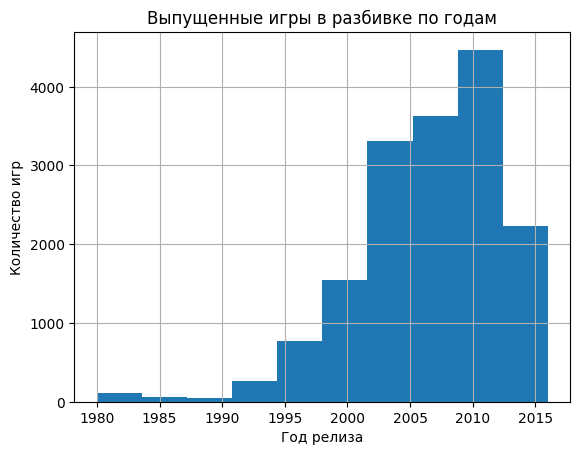

In [18]:
games_total = games_first['year_of_release'].plot(kind='hist',grid=True)
games_total.set_title('Выпущенные игры в разбивке по годам')
games_total.set_ylabel('Количество игр')
games_total.set_xlabel('Год релиза');

Видим значительный рост по выпуску игр приблизительно с 2002 по 2012 гг(пик примерно в 2008-2009 г.), далее общий спад продаж. Для определения актуального периода для дальнейшего исследования выясним:

- как менялись продажи по платформам; 
- за какой характерный срок появляются новые и исчезают старые платформы?


          total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.33
wii            891.18
ds             802.78
ps             727.58
ps4            314.14
gba            312.88
psp            289.53
3ds            257.81


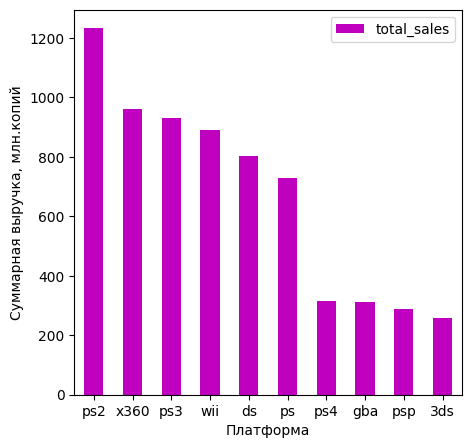

In [19]:
# посмотрим на то-10 платформ по общим продажам

platform_pivot = \
games_first.pivot_table(index='platform', values='total_sales', aggfunc={'total_sales':'sum'}) \
    .sort_values(by='total_sales', ascending=False) \
    .head(10)

print(platform_pivot)

platform_pivot.plot(kind='bar',figsize=(5,5),color='m', rot=0)
plt.xlabel('Платформа')
plt.ylabel('Суммарная выручка, млн.копий');


- Обратим внимание на то, что в топ-10 бОльшую долю занимают консоли PlayStation.

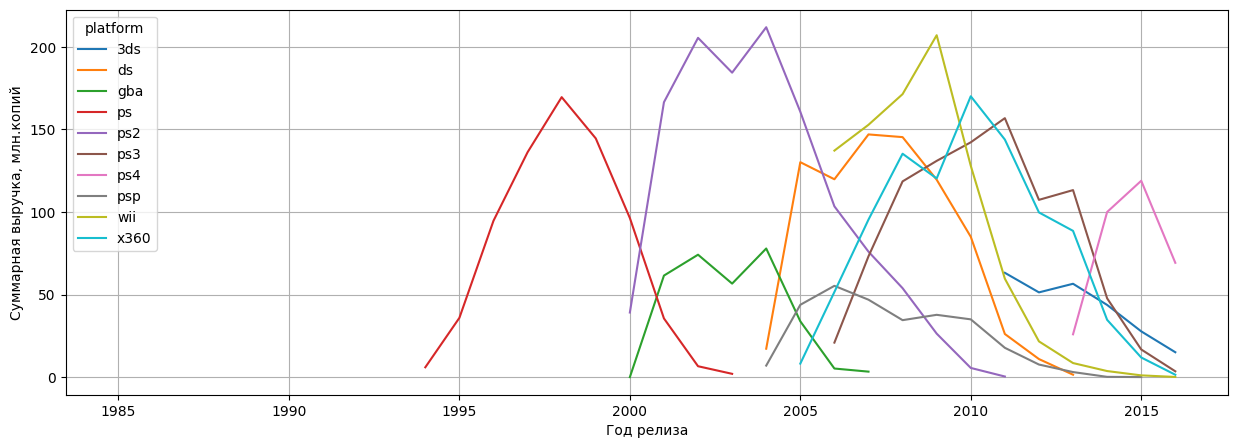

In [20]:
# сделаем распределение общих продаж по годам для топ-10

platform_to_year = pd.pivot_table(
        games_first[games_first['platform'].isin(platform_pivot.index)],
        values='total_sales',
        index='year_of_release',
        columns='platform',
        aggfunc={'total_sales': 'sum'}
    )


platform_to_year.plot(grid=True, figsize=(15, 5))
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка, млн.копий');


По графику можно примерно сориентироваться в отношении "жизни" платформы - около 8-10 лет, пики продаж приходятся ближе к середине срока "жизни" ~ 3-5 лет

          max_year  min_year  duration
platform                              
3ds           2016      2011         5
gba           2007      2000         7
ps            2003      1994         9
ps2           2011      2000        11
ps3           2016      2006        10
ps4           2016      2013         3
psp           2015      2004        11
wii           2016      2006        10
x360          2016      2005        11


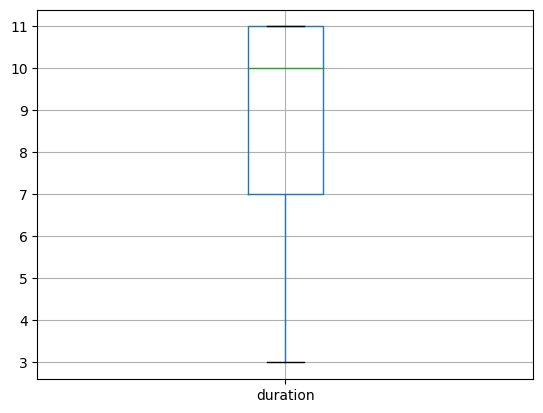

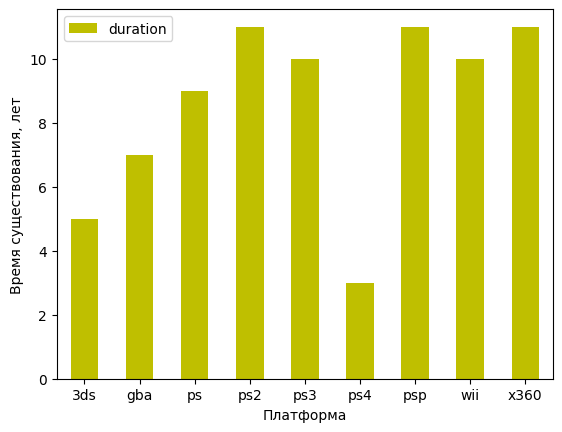

In [21]:
# сделаем более наглядный график "жизни" платформ

a= games_first.loc[games_first['platform'].isin(platform_pivot.index)]

b= a.groupby('platform').agg(max_year=('year_of_release', 'max'), min_year=('year_of_release', 'min'))                       


b['duration'] = b['max_year'] - b['min_year']


b = b[b['duration'] <= 15]
print(b)

b.boxplot(column=['duration']);                                          


b.plot(kind='bar',y='duration',rot=0, color='y')
plt.xlabel('Платформа')
plt.ylabel('Время существования, лет');

**Сделаем выводы:**

- общие продажи имеют тенденцию к спаду с 2012г;
- в среднем время "жизни" платформы - 8-10 лет, пики продаж, чаще всего, приходятся примерно на середину этого срока;и этот же срок требуется, чтобы окончательно ушло старое поколение платформы;
- в топ-10 по продажам бОльшую долю занимают консоли PlayStation, также, стоит обратить внимание на Xbox.

Исходя из вышеизложенного, актуальным периодом для дальнейшего исследования можем считать 2014 - 2016 гг( в таком случае, будем думать о возможности пиков по продажам платформ от 2014 г к 2017 г).

* Стоит отметить общую тенденцию к спаду спустя 2,5 года от выхода нового поколения.

#### Возьмем данные за актуальный период - с 2014 г и продолжим исследование: 

- какие платформы лидируют по продажам, растут или падают? определим потенциально прибыльные платформы;
- построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [22]:
games_filtered = games_first[games_first['year_of_release'] >=2014]
games_filtered['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

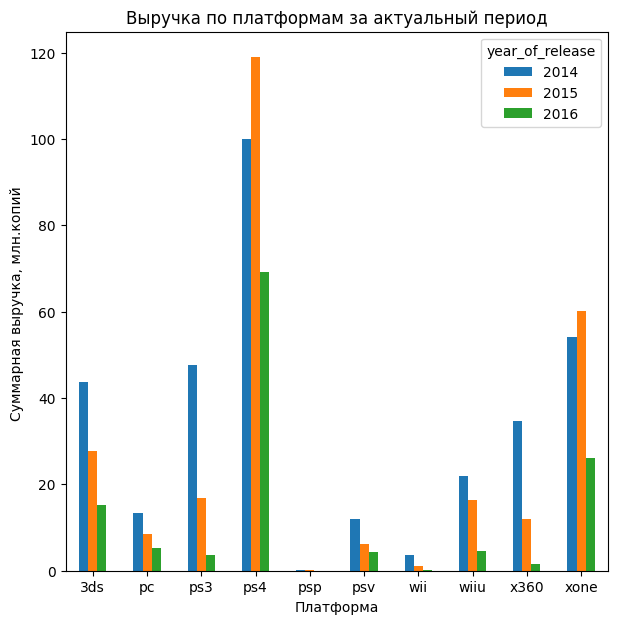

In [23]:
platform_top_filtered = \
games_filtered.pivot_table(
    index='platform', 
    values='total_sales', 
    columns= 'year_of_release',
    aggfunc={'total_sales':'sum'}) \
    .sort_values(by='platform') \
    .head(10)

platform_top_filtered.plot(kind='bar',figsize=(7,7), rot= 0)
plt.title('Выручка по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Суммарная выручка, млн.копий ');


На этом графике видим общую тенденцию к спаду продаж; выделяется лидер по общим продажам - PS4, на втором месте консоль Xbox - XOne,которая появилась на нашем графике с момента начала оценки данных за актуальный период.

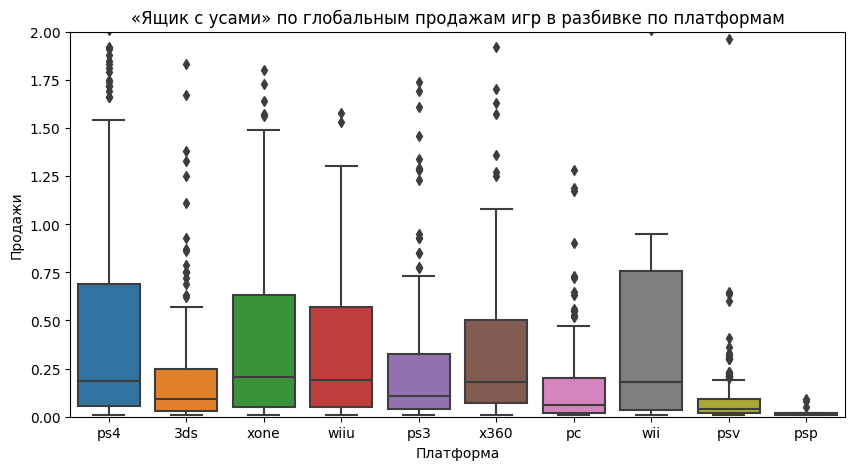

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=games_filtered['platform'], y=games_filtered['total_sales'])
plt.ylim(0,2)
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

**Сделаем выводы:**
- явный лидер - PS4, 
- на втором месте - XOne;
- обращает на себя внимание кол-во выбросов у PS3 и X360, 3DS; помним о предществующих выводах - время "жизни" старой консоли; 
- явный спад продаж игр на ПК.

#### Посмотрим, как влияют на продажи внутри одной платформы - PS4, отзывы пользователей и критиков

C:\Users\Natalya\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


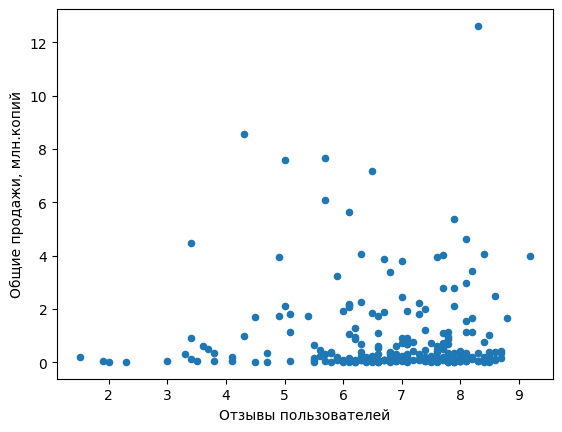

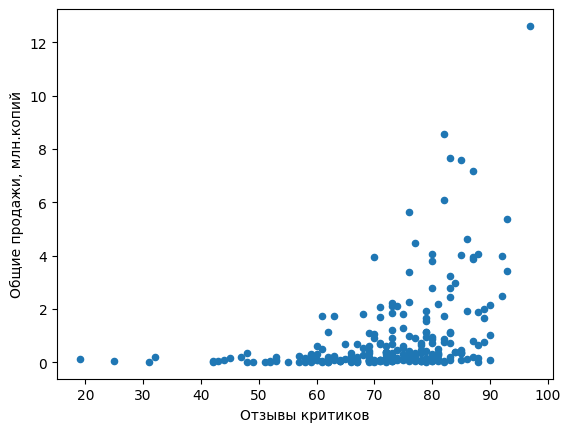

-0.04013158973738033
0.40266141068104083


In [25]:
# отфильтруем данные по необходимой информации и построим диаграмму рессеяния
one_platform_users = games_filtered[(games_filtered['platform'] == 'ps4') & (games_filtered['user_score'] != 0)]

one_platform_critic = games_filtered[(games_filtered['platform'] == 'ps4') & (games_filtered['critic_score'] != 0)]


one_platform_users.plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи, млн.копий')
plt.show()


one_platform_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи, млн.копий')
plt.show()


print(one_platform_users['total_sales'].corr(one_platform_users['user_score']))
print(one_platform_critic['total_sales'].corr(one_platform_critic['critic_score']))

Итак, мы видим, что цифры корреляции вполне соответствуют и диаграмме рассеяния. А именно, продажи совершенно не зависят от оценок пользователей. Оценка критиков имеет более "значимый вес", связь не очень сильная, но есть.

Далее необходимо посмотреть какова картина для других платформ. 

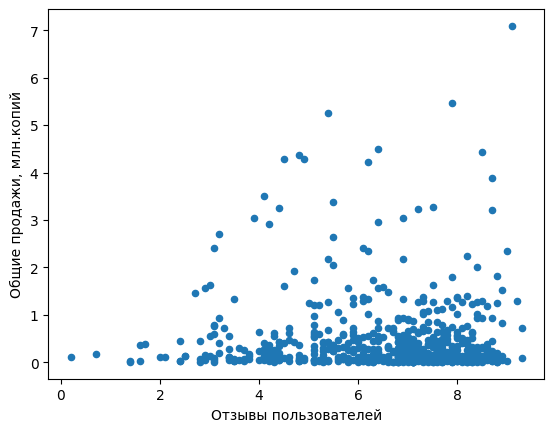

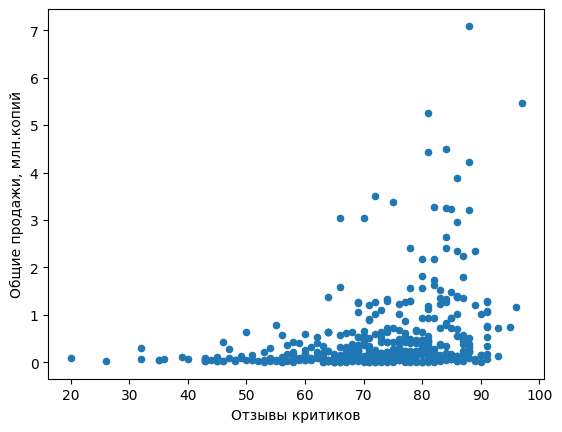

-0.023478189997179107
0.3094740026001153


In [26]:
other_platform_users = games_filtered[(games_filtered['platform'] != 'ps4') & (games_filtered['user_score'] != 0)]

other_platform_critic = games_filtered[(games_filtered['platform'] != 'ps4') & (games_filtered['critic_score'] != 0)]

other_platform_users.plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи, млн.копий')
plt.show()

other_platform_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи, млн.копий')
plt.show()


print(other_platform_users['total_sales'].corr(other_platform_users['user_score']))
print(other_platform_critic['total_sales'].corr(other_platform_critic['critic_score']))

#### Сделаем вывод:
- у лидера продаж - PS4 - не отмечено влияния на продажи оценки пользователя, оценка критиков имеет более "значимый вес", связь не очень сильная, но есть.
- ситуация аналогична и для других платформ.

#### Посмотрим на общее распределение игр по жанрам

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: total_sales, dtype: float64


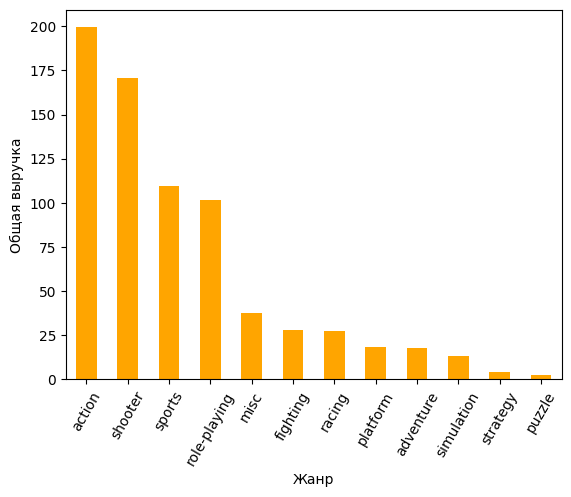

In [27]:
genre_group = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_group)

genre_group.plot(kind='bar',rot=60,color='orange')
plt.xlabel('Жанр')
plt.ylabel('Общая выручка');

По представленнному графику лидером в отношении общей выручки является жанр Action, посмотрим, что мы имеем по средним продажам.

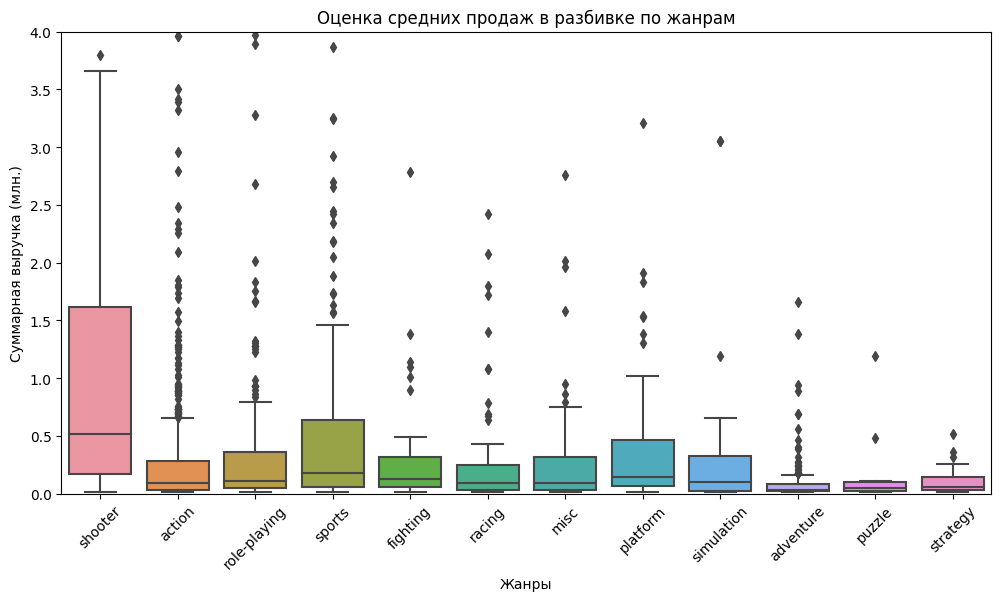

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='total_sales', data=games_filtered)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Оценка средних продаж в разбивке по жанрам')
plt.ylim([0,4])
plt.xticks(rotation=45);

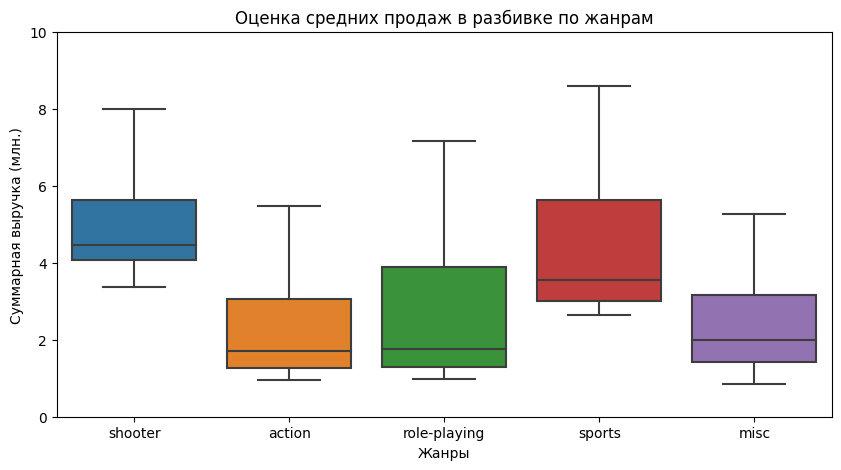

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='genre',
    y='total_sales',
    data=games_filtered[
        ((games_filtered['genre'] == 'shooter') & (games_filtered['total_sales'] >= 3.3))
        | ((games_filtered['genre'] == 'action') & (games_filtered['total_sales'] >= 0.95))
        | ((games_filtered['genre'] == 'sports') & (games_filtered['total_sales'] >= 2.45))
        | ((games_filtered['genre'] == 'misc') & (games_filtered['total_sales'] >= 0.8))
        | ((games_filtered['genre'] == 'role-playing') & (games_filtered['total_sales'] >= 0.95))
    ])
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Оценка средних продаж в разбивке по жанрам')
plt.ylim([0, 10])
plt.xticks(rotation=0);

**Сделаем выводы:** игры жанра Action показывают макс по общей выручке, однако, стоит обратить внимание, что жанр Shooter - явный и стабильный лидер по средним продажам. Ввиду чего, можно предположить, что игры в жанре Аction более дорогостоящие, создание требует больше затрат.

**Общий вывод по результатам исследовательского анализа:**

- общие продажи имееют тенденцию к спаду с 2012г;

- в среднем время "жизни" платформы - 8-10 лет, 

- пики продаж, чаще всего, приходятся примерно на середину этого срока;и этот же срок требуется, чтобы окончательно ушло старое поколение платформы;

- отмечаем общую тенденцию к спаду спустя 2,5 года от выхода нового поколения;

- актуальный период для исследования - 2014 -2016 гг.;

- явный лидер - PS4, на втором месте - XOne;

- игры жанра Action показывают макс по общей выручке, однако, стоит обратить внимание, что жанр Shooter - явный и стабильный лидер по средним продажам. Ввиду чего, можно предположить, что игры в жанре Аction более дорогостоящие, создание требует больше затрат.

### Перейдем к составлению портрета пользователя каждого региона

Вспомним, данные по каким регионам у нас представлены:

- na_sales — продажи в Северной Америке;
- eu_sales — продажи в Европе;
- jp_sales — продажи в Японии;
- other_sales — продажи в других странах.

In [30]:
# учитывая,что нам предстоят однотипные действия по всем региона м было принято решение использовать функцию
def region_sales_top(group_by, region, ax):
    top_five = games_filtered.groupby(group_by).agg({region: 'sum'}).sort_values(by=region, ascending=False)[:5]
    games_filtered[f'{group_by}_other'] = games_filtered[group_by]
    games_filtered.loc[~ (games_filtered[f'{group_by}_other'].isin(top_five.index)), f'{group_by}_other'] = 'other'
    for_plot = games_filtered.groupby(f'{group_by}_other').agg({region: 'sum'}).sort_values(by=region, ascending=False)
    
    title_change = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония', 'other_sales': 'Другие регионы'}
    color_diff = {'na_sales': 'blue', 'eu_sales': 'red', 'jp_sales': 'green', 'other_sales': 'm'}
    region_plot = for_plot.plot(kind='bar', title=title_change[region], ax=axes[ax],
                                fontsize=16, color=color_diff[region], rot=25)
    region_plot.legend(prop={'size':15})
    region_plot.title.set_size(20)
    

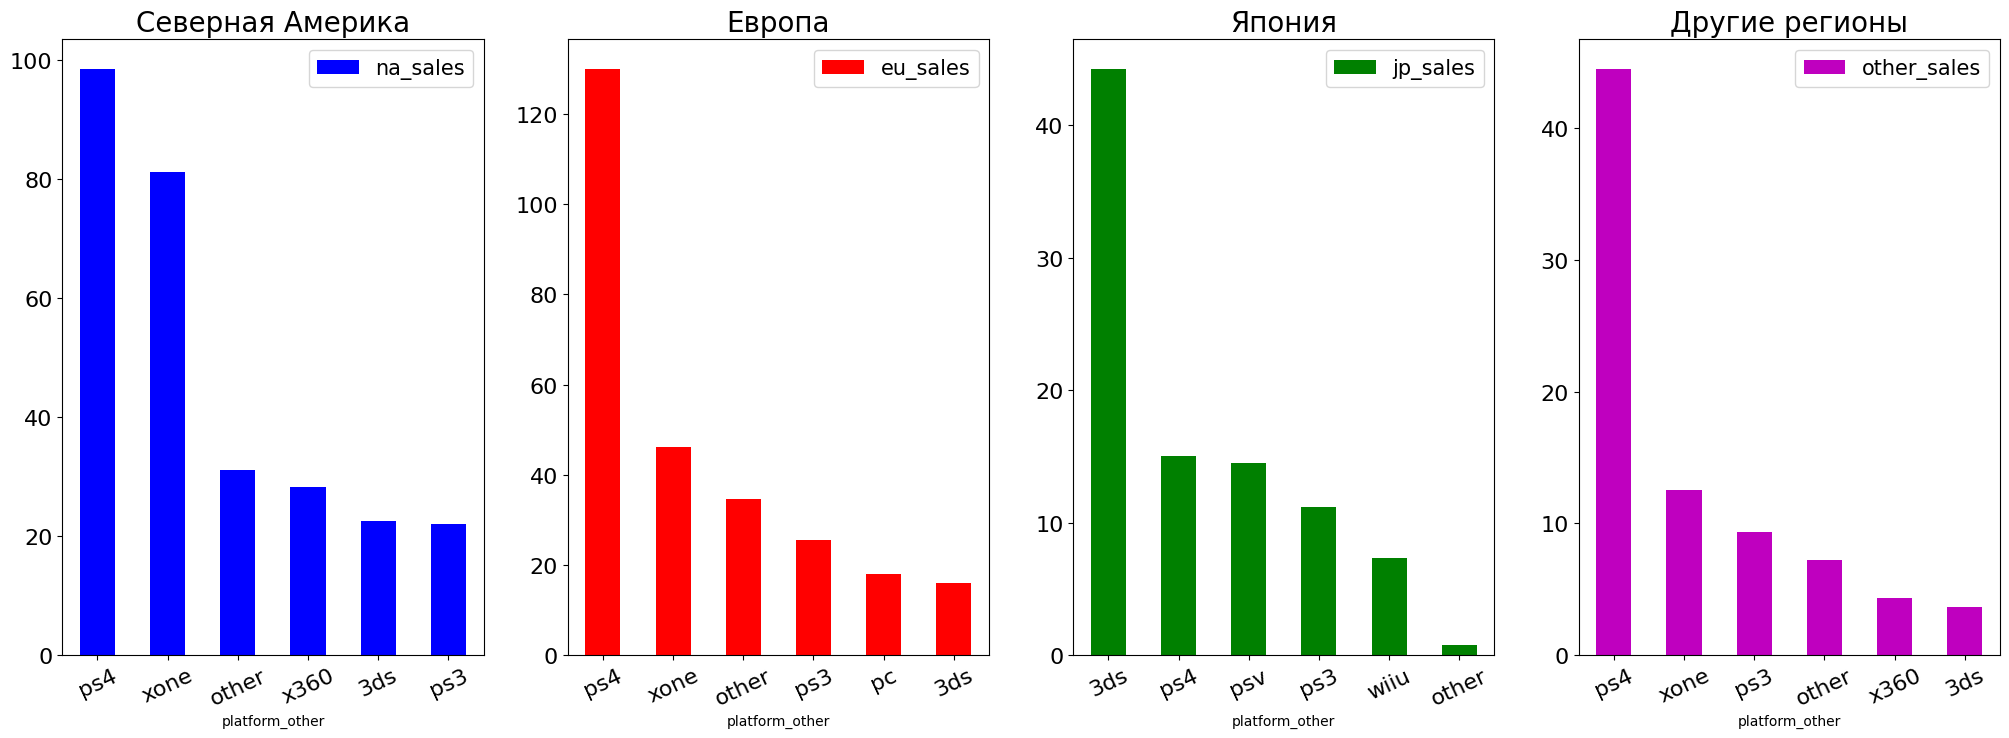

In [31]:
# топ-5 платформ
fig, axes = plt.subplots(1, 4, figsize=(25,8))

region_sales_top('platform', 'na_sales', 0)
region_sales_top('platform', 'eu_sales', 1)
region_sales_top('platform', 'jp_sales', 2)
region_sales_top('platform', 'other_sales', 3)

**Топ-5 по платформам:**

Северная Америка: PS4, XOne, X360, 3DS, PS3.

Европа: PS4, XOne, PS3, PC, 3DS.

Япония: 3DS, PS4, PSV, PS3, WiiU.

Другие регионы: PS4, XOne, PS3, X360, 3DS.


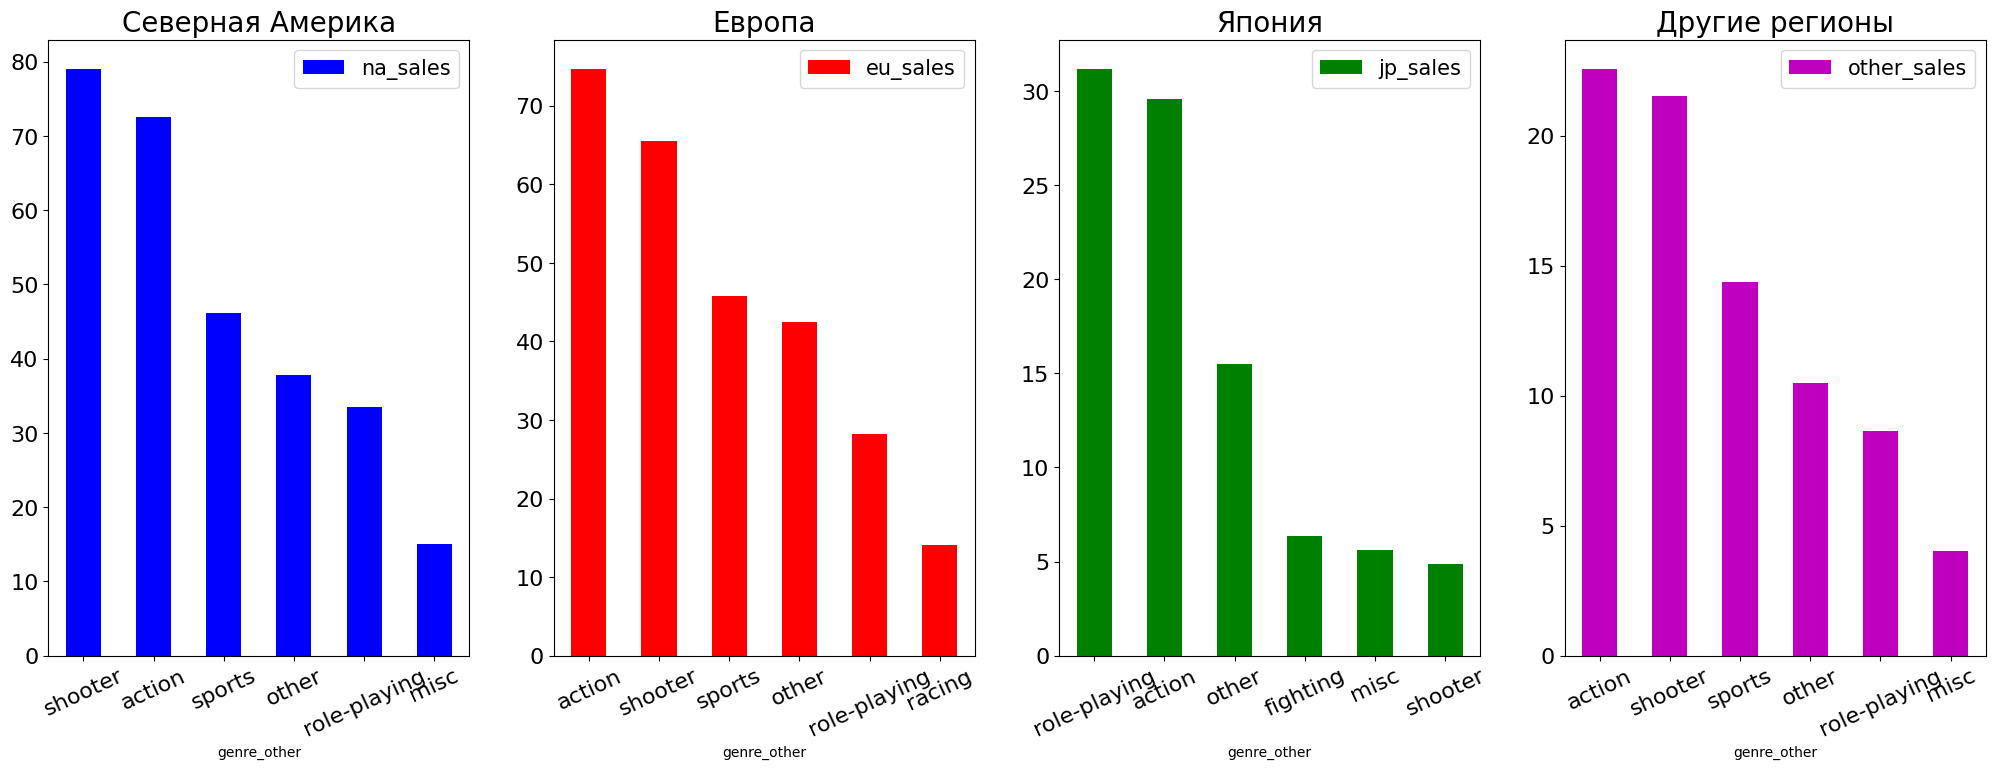

In [32]:
# топ-5 жанров
fig, axes = plt.subplots(1, 4, figsize=(25,8))

region_sales_top('genre', 'na_sales',0)
region_sales_top('genre', 'eu_sales',1)
region_sales_top('genre', 'jp_sales',2)
region_sales_top('genre', 'other_sales',3)

**Топ-5 по жанрам:**

Северная Америка: Shooter, Action, Sports, Role-Playing, Misc.

Европа: Action, Shooter, Sports, Role-Playing, Racing.

Япония: Role-Playing, Action, Fighting, Misc, Shooter.

Другие регионы: Action, Shooter, Sports, Role-Playing, Misc.


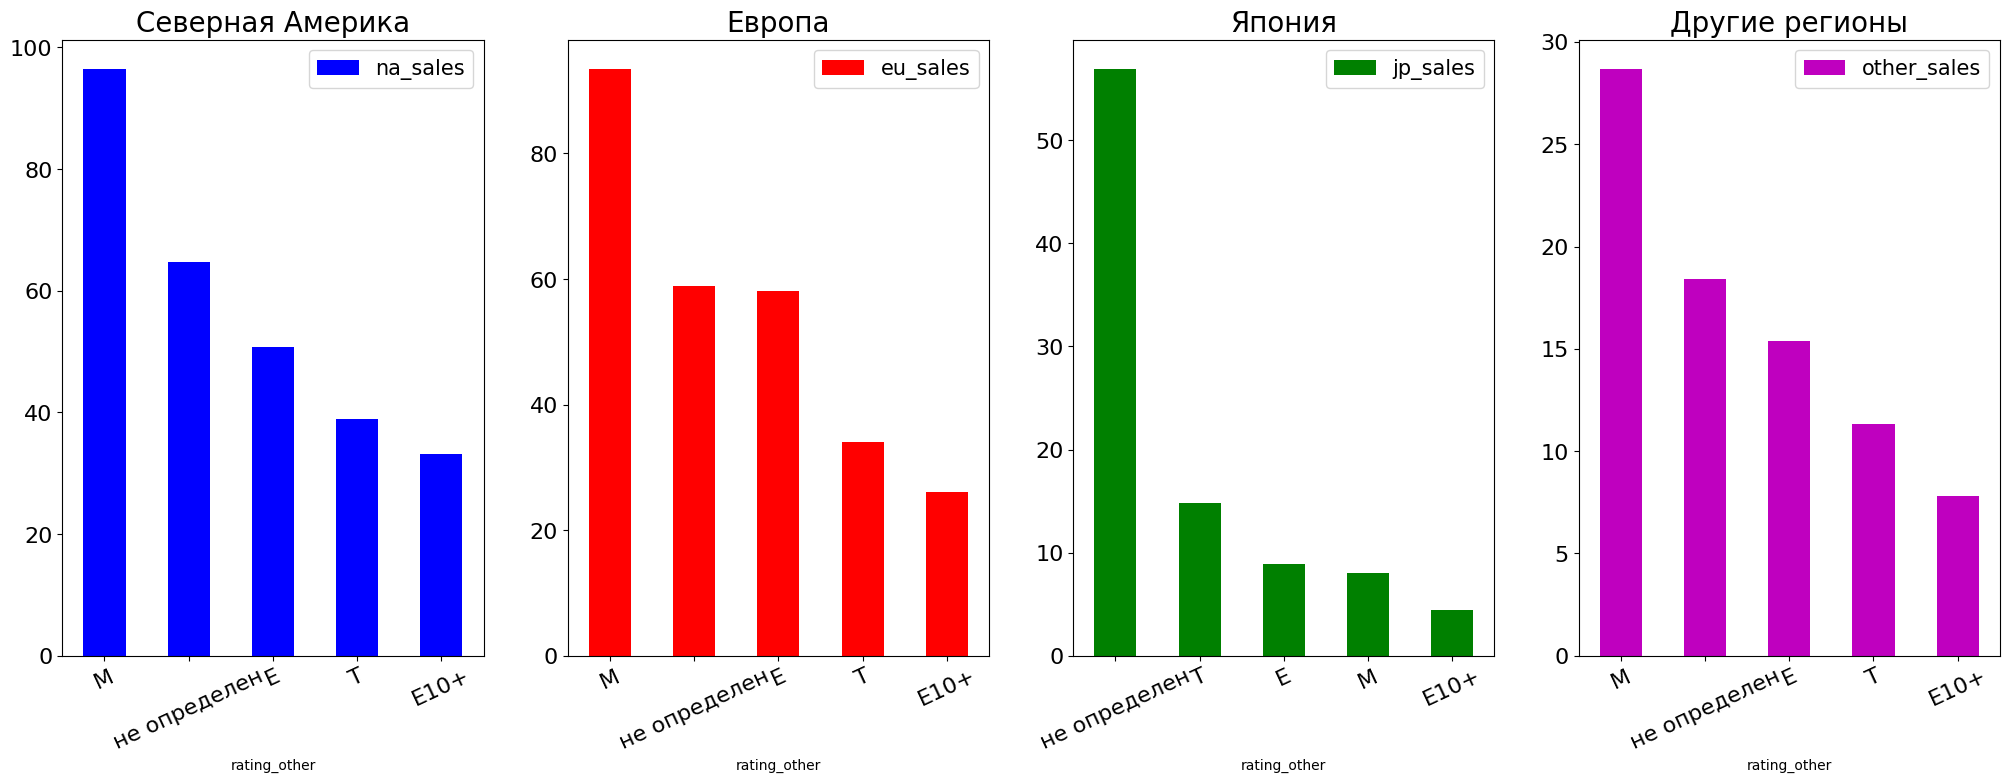

In [33]:
# топ-5 по рейтингу
fig, axes = plt.subplots(1, 4, figsize=(25,8))

region_sales_top('rating', 'na_sales',0)
region_sales_top('rating', 'eu_sales',1)
region_sales_top('rating', 'jp_sales',2)
region_sales_top('rating', 'other_sales',3)

**Топ-5 по рейтингу:**

Северная Америка: М,'не определен', Е, Т, Е10+.

Европа: М,'не определен', Е, Т, Е10+.

Япония: 'не определен', Т, E, M, Е10+.

Другие регионы: М,'не определен', Е, Т, Е10+.

Опишем особенности пользователей из разных регионов:

1. **Северная Америка:**

- Топ-5 игровых платформ: PS4, XOne, X360, 3DS, PS3. Большой отрыв у PS4 и XOne.Стоит отметить, что общая сумма продаж не вошедших в топ-5 платформ занимает третье место.
- Топ-5 жанров: Shooter, Action, Sports, Role-Playing, Misc. Стоит отметить, что общая сумма продаж не вошедших в топ-5 жанров занимает четвертое место.
- Топ -5 по рейтингу: М,'не определен', Е, Т, Е10+. Т.е большая часть игр в категории для лиц старше 17 лет и стоит обратить внимание на большое кол-во игр с неопределенным рейтингом.

2. **Европа:**

- Топ-5 игровых платформ: PS4, XOne, PS3, PC, 3DS. Большой отрыв у PS4. Стоит отметить, что общая сумма продаж не вошедших в топ-5 платформ занимает третье место.
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing. Стоит отметить, что общая сумма продаж не вошедших в топ-5 жанров занимает четвертое место.
- Топ-5 по рейтингу: М,'не определен', Е, Т, Е10+. Аналогичная Северной Америке картина.

3. **Япония:**

- Топ-5 игровых платформ: 3DS, PS4, PSV, PS3, WiiU. Большой отрыв у местной 3DS. 
- Топ-5 жанров: Role-Playing, Action, Fighting, Misc, Shooter. Стоит отметить, что общая сумма продаж не вошедших в топ-5 жанров занимает третье место.
- Топ-5 по рейтингу:'не определен', Т, E, M, Е10+.Ожидаемая картина, с учетом того, на какие регионы оринтирован ESRB.

4. **Другие регионы:**

- Топ-5 игровых платформ: PS4, XOne, PS3, X360, 3DS. Большой отрыв у местной PS4.Стоит отметить, что общая сумма продаж не вошедших в топ-5 платформ занимает четвертое место.
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc. Стоит отметить, что общая сумма продаж не вошедших в топ-5 жанров занимает четвертое место.
- Топ-5 по рейтингу:М,'не определен', Е, Т, Е10+. Аналогичен Европе и Северной Америке.


**Из 4-х групп выделяется Япония.**

### Проверим гипотезы

Учитывая результаты ранее проведенного исследования, проверим:

1. Отзывы пользователей (средние) для платформ XOne и PC одинаковы?
2. Отзывы пользователей (средние) для жанров Action и Sports разные?

In [34]:
#  подготовим данные для исследования - нам потребуется отфильтровать имеющиеся данные, избавиться от пропусков

games_to_hypothesis = games_filtered.dropna(subset=['user_score']).reset_index(drop=True)

#### Первая гипотеза

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC равны.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

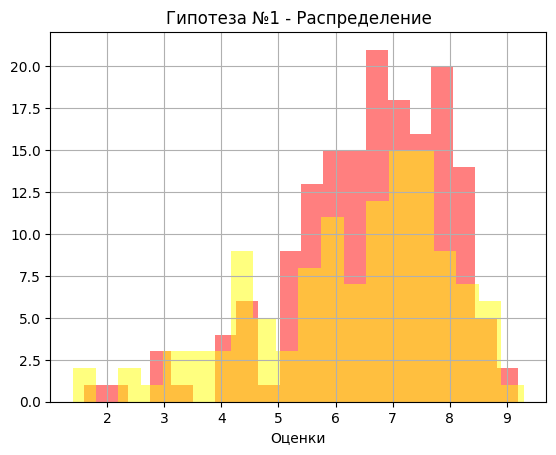

In [35]:
a = games_to_hypothesis[games_to_hypothesis['platform'] == 'xone']['user_score']
b = games_to_hypothesis[games_to_hypothesis['platform'] == 'pc']['user_score']
# предварительно посмотрим на распределение

a.hist(bins=20, alpha=0.5, color='red')
b.hist(bins=20, alpha=0.5, color='yellow')
plt.xlabel('Оценки')
plt.title('Гипотеза №1 - Распределение')
plt.show()

По распределению, наибольшее кол-во оценок для XOne в диапозоне 6,7 - 6,9, для PC 6,9 - 7,9. Но стоит обратить внимание и на смещение влево, особенно для РС.

In [36]:
# перейдем к проверке 1-ой гипотезы
result1 = st.ttest_ind(a,b,equal_var=False)

alpha = 0.05

print('p-значение:', result1.pvalue)

if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


**Итог:** по результатам ttest-a мы не можем отвергнуть нулевую гипотезу; т.е. принимаем нулевую - средние пользовательские рейтинги платформ Xbox One и PC равны.

**Вторая гипотеза**

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги жанров Action и Sports равны.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

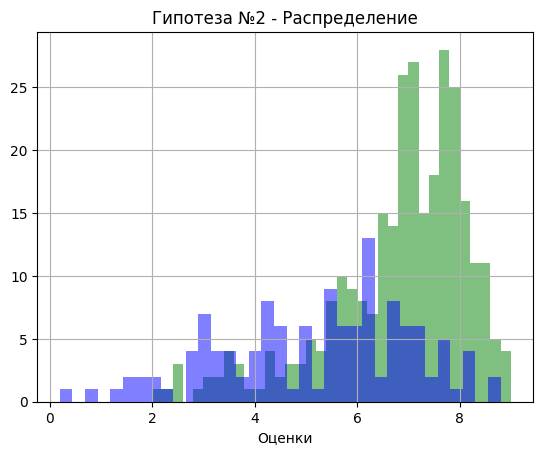

In [37]:
c = games_to_hypothesis[games_to_hypothesis['genre'] == 'action']['user_score']
d = games_to_hypothesis[games_to_hypothesis['genre'] == 'sports']['user_score']

# предварительно посмотрим на распределение

c.hist(bins=35, alpha=0.5, color='green')
d.hist(bins=35, alpha=0.5, color='blue')
plt.xlabel('Оценки')
plt.title('Гипотеза №2 - Распределение')
plt.show()

По распределению, наибольшее кол-во оценок для Action в диапозоне 7,4 - 7,5, для Sports 6,1 - 6,3. И здесь смещенное распределение.

In [38]:
# перейдем к проверке 2-ой гипотезы

result2 = st.ttest_ind(c,d,equal_var=False)

alpha = 0.05

print('p-значение:', result2.pvalue)

if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    

p-значение: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


**Итог:** ttest показал нам, что различия значимы и мы можем принять альтернативную гипотезу - средние пользовательские рейтинги жанров Action и Sports различаются. 

## Итоговый вывод

**На первых этапах исследования были подробно оценены представленные данные,после чего отмечено:**

- особенности оформления;
- некорректный тип данных для числовых значений;
- наличие большого кол-ва пропусков в колонках с оценками и рейтингом;
- неявные дубликаты.

**После проведения предобработки данных, по  результатам исследовательского,статистического анализа можно сделать вывод, что:**

- общие продажи имеют тенденцию к спаду с 2012г;
- игры на ПК теряют популярность;
- в топ-10 по продажам бОльшую долю занимают консоли PlayStation, затем Xbox;
- в среднем время "жизни" платформы - 8-10 лет;
- пики продаж, чаще всего, приходятся примерно на середину этого срока;и этот же срок требуется, чтобы окончательно ушло старое поколение платформы;
- продажи игр совершенно не зависят от оценок пользователей; оценка критиков имеет более "значимый вес", связь не очень сильная, но есть;
- наибольший интерес представляют игры жанров Action и Shooter.

**При ориентации на определенную географию рынка стоит иметь ввиду, что:**

**1. Для Северной Америки:**

- Топ-5 игровых платформ: PS4, XOne, X360, 3DS, PS3. Большой отрыв у PS4 и XOne.
- Топ-5 жанров: Shooter, Action, Sports, Role-Playing, Misc.
- Топ -5 по рейтингу: М,'не определен', Е, Т, Е10+. Т.е большая часть игр в категории для лиц старше 17 лет и стоит обратить внимание на большОе кол-во игр с неопределенным рейтингом.


**2. Для Европы:**

- Топ-5 игровых платформ: PS4, XOne, PS3, PC, 3DS. Большой отрыв у PS4.
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing.
- Топ-5 по рейтингу: М,'не определен', Е, Т, Е10+. Аналогичная Северной Америке картина.


**3. Для Японии:**

- Топ-5 игровых платформ: 3DS, PS4, PSV, PS3, WiiU. Большой отрыв у местной 3DS.
- Топ-5 жанров: Role-Playing, Action, Fighting, Misc, Shooter.
- Топ-5 по рейтингу:'не определен', Т, E, M, Е10+.Ожидаемая картина, с учетом того, на какие регионы оринтирован ESRB.


**4. Для других регионов:**

- Топ-5 игровых платформ: PS4, XOne, PS3, X360, 3DS. Большой отрыв у местной PS4.
- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
- Топ-5 по рейтингу:М,'не определен', Е, Т, Е10+. Аналогичен Европе и Северной Америке.


**Из 4-х групп выделяется Япония - иной "набор" популярных платформ, отсутствие влияния рейтинга**


Учитывая полученные итоги, может быть рекомендовано сделать акцент на:

- PS4 и представителей Xbox,
- Среди жанров - Action и Shooter,
- Среди игр с отмеченным рейтингом  - выбирать игры с рейтингом М, т.е. - от 17 лет и старше,
- Отмечать в рекламных кампаниях отзывы критиков.
